# COMP90014 Assignment 2
### Semester 2, 2023
Version 1.1 Last edited 04/09/2023.

In [1]:
### Fill in your student details here
NAME = "Keziah Tikno"
ID = "1319716"

## Completing the assignment


***Networkx***

This assignment makes heavy use of the [networkx](https://networkx.org/documentation/stable/reference/introduction.html) graph package. <br>
You need to have `networkx >= 3.1` installed to complete the assignment. 

Clear instructions for how to use relevant networkx functionality will be given for each question. <br>
Except for Question 1, you are free to use whatever networkx functions you like. 

***Please ensure you use jupyter when modifying this document.***

For individual questions feel free to work on your solution in an IDE (eg VSC), but please only make modifications to this document while using jupyter. 


***Academic integrity***

This assignment should be completed by each student individually. <br>
Make sure you read this entire document, and ask for help if anything is not clear. <br>
Any changes or clarifications to this document will be announced via the LMS. <br>

Please make sure you review the University's rules on academic honesty and plagiarism: https://academichonesty.unimelb.edu.au/

Do not copy any code from other students or from the internet. This is considered plagiarism.

***Completing the assignment & submission***

To complete the assignment, finish the coding and short answer tasks in this notebook.<br>
Please do not copy or delete cells in this notebook, as this may interrupt the autograding of hidden tests. <br>
Your completed notebook file containing all your answers will be turned in via LMS. Please also submit an HTML file.

***Visible & hidden tests***

In some cases, we have provided test input and test output that you can use to try out your solutions. <br> 
These are visible tests and serve to warn you if you've made a mistake but are **not** exhaustive.

During assessment, there are also hidden tests we run to validate your code. <br>
As you won't see the hidden tests, it's up to you to decide whether your code is correct.

**Remember to save your work early and often.**

## Marking

***Graded cells***

Cells that must be completed to receive marks are clearly labelled with the following text:

`# -- GRADED CELL (N marks) - complete this cell --`

Only add answers to these cells. 

Some cells are code cells, in which you must complete the code to solve a problem. <br>
Others are markdown cells, in which you must write your answers to short-answer questions. 

<br>

***Completing code cells***

You will see the following text in graded code cells:

``` python
raise NotImplementedError()
```
You must remove the `raise NotImplementedError()` line from the cell, and replace it with your solution.<br>
If you want to import a library or use a helper function, the import statements must be inside the function for that question. 

For example, as seen in Q4B:
``` python
def populate_dist_matrix(dist_matrix, sequences, k=3):
    """
    populates and returns the distance matrix with distance values. 
    distance is calculated using utils.kmer_dist(seq1, seq2, k).
    """
    from A2.utils import kmer_dist
```

Include code comments in your solutions! <br>
Well commented code can help you to receive partial marks even if the final solution is incorrect. 

<br>

***Editing the notebook***

Only graded cells will be marked.
- Do **NOT** enter solutions outside of graded cells
- Do **NOT** duplicate or remove cells from the notebook
- You may add new cells to test code, but new cells will not be graded.
- Word limits, where stated, will be strictly enforced. Answers exceeding the limit **will not be marked**.

<br>

***Marks***

- The total marks for the assignment add up to 40.
- This assignment will be worth 15% of your overall subject grade.
- No marks are allocated to commenting in your code, except for where it helps you achieve partial marks (see above).
- We do however, encourage efficient and well commented code.

## Submission

Make sure you have filled in any place that says `# -- GRADED CELL (N marks) - complete this cell --`.

Before you turn this assignment in, make sure everything runs as expected, and the output is cleared. 

First, **restart the kernel**:

- In the menubar, select Kernel -> Restart.

Next, **run all cells**:

- In the menubar, select Cell -> Run All.

Finally, **clear all output**:

- In the menubar, select Options -> Clear All Outputs

Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format. <br>
You must also submit a copy of this notebook in `html` format with the output cleared.

Your submission should include **only two** files with names formatted as: **Assignment_1.ipynb** and **Assignment_1.html**



<div style="background: rgb(255,165,0); border: solid 1px rgb(129,199,132); padding: 10px;">    

<h1>SETUP AND DATA</h1>

</div>

### Acquire Helper Functions & Datasets

Run either of the following cells to get the assignment 2 (A2) helper functions and data. <br>
You do not need to use pypi or pip install. This is cloning a github repo which contains files and code. 

In [1]:
# if running on Linux or Mac
!rm -rf A2
!git clone -b A2 https://github.com/melbournebioinformatics/COMP90014 A2

Cloning into 'A2'...
remote: Enumerating objects: 239, done.
remote: Counting objects: 100% (239/239), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 239 (delta 71), reused 206 (delta 41), pack-reused 0
Receiving objects: 100% (239/239), 22.29 MiB | 3.27 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [2]:
# if running on Windows
!Remove-Item -Path A2 -Force -Recurse
!git clone -b A2 https://github.com/melbournebioinformatics/COMP90014 A2

zsh:1: command not found: Remove-Item
fatal: destination path 'A2' already exists and is not an empty directory.


In [3]:
TRAVEL_UNGRAPH_FILEPATH = './A2/data/travel_ungraph.pickle'
TRAVEL_DIGRAPH_FILEPATH = './A2/data/travel_digraph.pickle'
TRAVEL_POSITIONS_FILEPATH = './A2/data/travel_positions.pickle'
SUFFIX_TRIE_FILEPATH = './A2/data/suffix_trie.pickle'
PPI_NETWORK_FILEPATH = './A2/data/saccharomyces_cerevisiae_ppi.pickle'

### Load Packages
For this assignment you may need to install some packages.

In [4]:
import networkx as nx
import pickle
import pydot
import matplotlib.pyplot as plt
from A2 import utils
import warnings
warnings.filterwarnings('ignore')

<div style="background: rgb(255,165,0); border: solid 1px rgb(129,199,132); padding: 10px;">    

<h1>NETWORKX FUNDAMENTALS</h1>

</div>

This assignment heavily uses the networkx package. 

In networkx we build our graph by adding nodes and edges. 

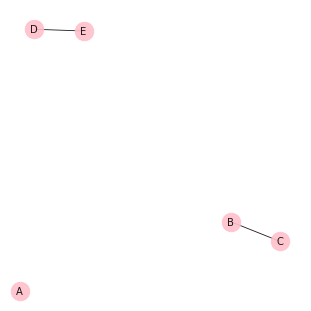

In [5]:
# creating an undirected graph
graph = nx.Graph()

# adding a node
graph.add_node('A')

# adding some edges (nodes will also be added if not present)
graph.add_edge('B', 'C')
graph.add_edge('D', 'E')

# drawing our graph
fig = plt.figure(1, figsize=(5, 5), dpi=60)
_ = nx.draw_spring(graph, with_labels=True, node_size=500, node_color='pink', alpha=0.9)

**Nodes and Neighbors**

Once you have created a graph, you can access its nodes. 

Each node has a unique identifier.

We can get information about nodes in the following ways:

In [6]:
# get list of all nodes
all_nodes = list(graph.nodes)
print(f'\nall nodes: {all_nodes}')

# getting neighbors of a node (connected by edge)
neighbors = list(graph.neighbors('E'))
print(f"\nneighbors of 'E': {neighbors}")


all nodes: ['A', 'B', 'C', 'D', 'E']

neighbors of 'E': ['D']


**Edges**

We can also get edges in our graph. 

Each edge in a networkx graph is a tuple of (node1, node2) participating in the edge. 

We can get information about edges in the following ways:

In [7]:
# get list of all edges
all_edges = list(graph.edges)
print(f'\nall edges: {all_edges}')

# getting edges from a particular node
b_edges = graph.edges('B')
print(f"\nedges from 'B': {b_edges}")

# check if an edge exists
has_edge = graph.has_edge('B', 'C')
print(f'\nhas edge? {has_edge}')


all edges: [('B', 'C'), ('D', 'E')]

edges from 'B': [('B', 'C')]

has edge? True


**Edges: Directed vs Undirected Graphs**

Networkx technically has 3 flavors of `graph.edges()`. 

- `graph.edges(node)`
- `graph.in_edges(node)`
- `graph.out_edges(node)`

For *undirected graphs*, these methods all return the same edges since there is no directionality. 

For *directed graphs*:
- `.in_edges()` returns edges pointing **to** the query node
- `.out_edges()` returns edges pointing **from** the query node
- `.edges()` has the same functionality as `.out_edges()`


**Edge Labels**

You can also assign data to networkx edges.

*In this assignment, any edge data is given the name ***'label'****

Below is an example using a directed graph. Both undirected and directed graphs can have edge labels.

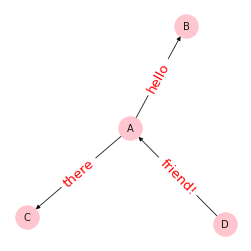

In [8]:
# creating directed graph
graph = nx.DiGraph()

# adding edges with labels
graph.add_edge('A', 'B', label='hello')
graph.add_edge('A', 'C', label='there')
graph.add_edge('D', 'A', label='friend!')

# drawing our graph
fig = plt.figure(1, figsize=(4, 4), dpi=60)
pos = nx.spring_layout(graph, iterations=10, seed=4)
_ = nx.draw(graph, pos, with_labels=True, node_size=800, node_color='pink', alpha=0.9)
_ = nx.draw_networkx_edge_labels(
    graph, pos, font_color='red', font_size=16, 
    edge_labels={e: f"{graph.edges[e]['label']}" for e in graph.edges}
)

**Getting Edge Labels**

For graphs with edge data, we can access that data by passing `data=True` when asking for edges. 

When you do this, the edges returned are tuples of `(node1, node2, data)`, where `data` is a dictionary of key: value pairs. 

In this assignment all edge data will be called `'label'`, so we can access the label in the following ways. 

In [9]:
# getting all edges & their data
all_edges = list(graph.edges(data=True))
print(f'\nall edges: {all_edges}')

# getting the edges from node 'D' with the edge data 
d_edges = list(graph.edges('D', data=True))
print(f'\nD edges: {d_edges}')

# printing out the first edge from 'D'
my_edge = d_edges[0]  # get the first edge in the out edges from 'D'
node1 = my_edge[0]
node2 = my_edge[1]
label = my_edge[2]['label'] 
print('\nsingle edge:')
print(f'node1 = {node1}')
print(f'node2 = {node2}')
print(f'label = {label}')


all edges: [('A', 'B', {'label': 'hello'}), ('A', 'C', {'label': 'there'}), ('D', 'A', {'label': 'friend!'})]

D edges: [('D', 'A', {'label': 'friend!'})]

single edge:
node1 = D
node2 = A
label = friend!


For further information, see the [networkx documentation](https://networkx.org/documentation/stable/reference/introduction.html).

<div style="background: rgb(255,165,0); border: solid 1px rgb(129,199,132); padding: 10px;">    

<h1>QUESTION 1</h1>

</div>

## Brief 

In this question we will do some basic working with networkx and graphs. 

We will build a graph, get some information from the graph, and then will do a greedy traversal. 

Throughout Question 1, you are **not allowed** to use the following networkx functions:

- `nx.density()`
- `nx.clustering()`

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 1A</h3>
    
<b>Challenge:</b> Write a function to generate an ***undirected*** networkx.Graph object given a list of edges.  
   
- [ ] Input: list of edges, where each edge is a tuple(node1, node2, label)
- [ ] Ouput: networkx.Graph object representing the data

Ensure you add the label for each edge. 
</div>

In [11]:
# -- GRADED CELL (2 marks) - complete this cell --

def create_graph(edges):
    '''
    Given a list of edges, generate a networkx.Graph to represent the edge data.
    '''
    # YOUR CODE HERE
    # Create an empty undirected graph
    graph = nx.Graph()
    
    # Allocating the edges to the graph given the edges is not empty
    if len(edges) > 0:
        for i in range(len(edges)):
            node1 = edges[i][0]
            node2 = edges[i][1]
            label = edges[i][2]
            graph.add_edge(node1, node2, label=label)

    # If the edges given are empty then return None
    else:
        return None

    # Otherwise return the graph
    return graph

In [12]:
# extra code cell for development if needed


test1 - is a undirected networkx graph? True
test2 - all nodes are correct? True
test3 - all edges are correct? True
test4 - all labels are correct? True


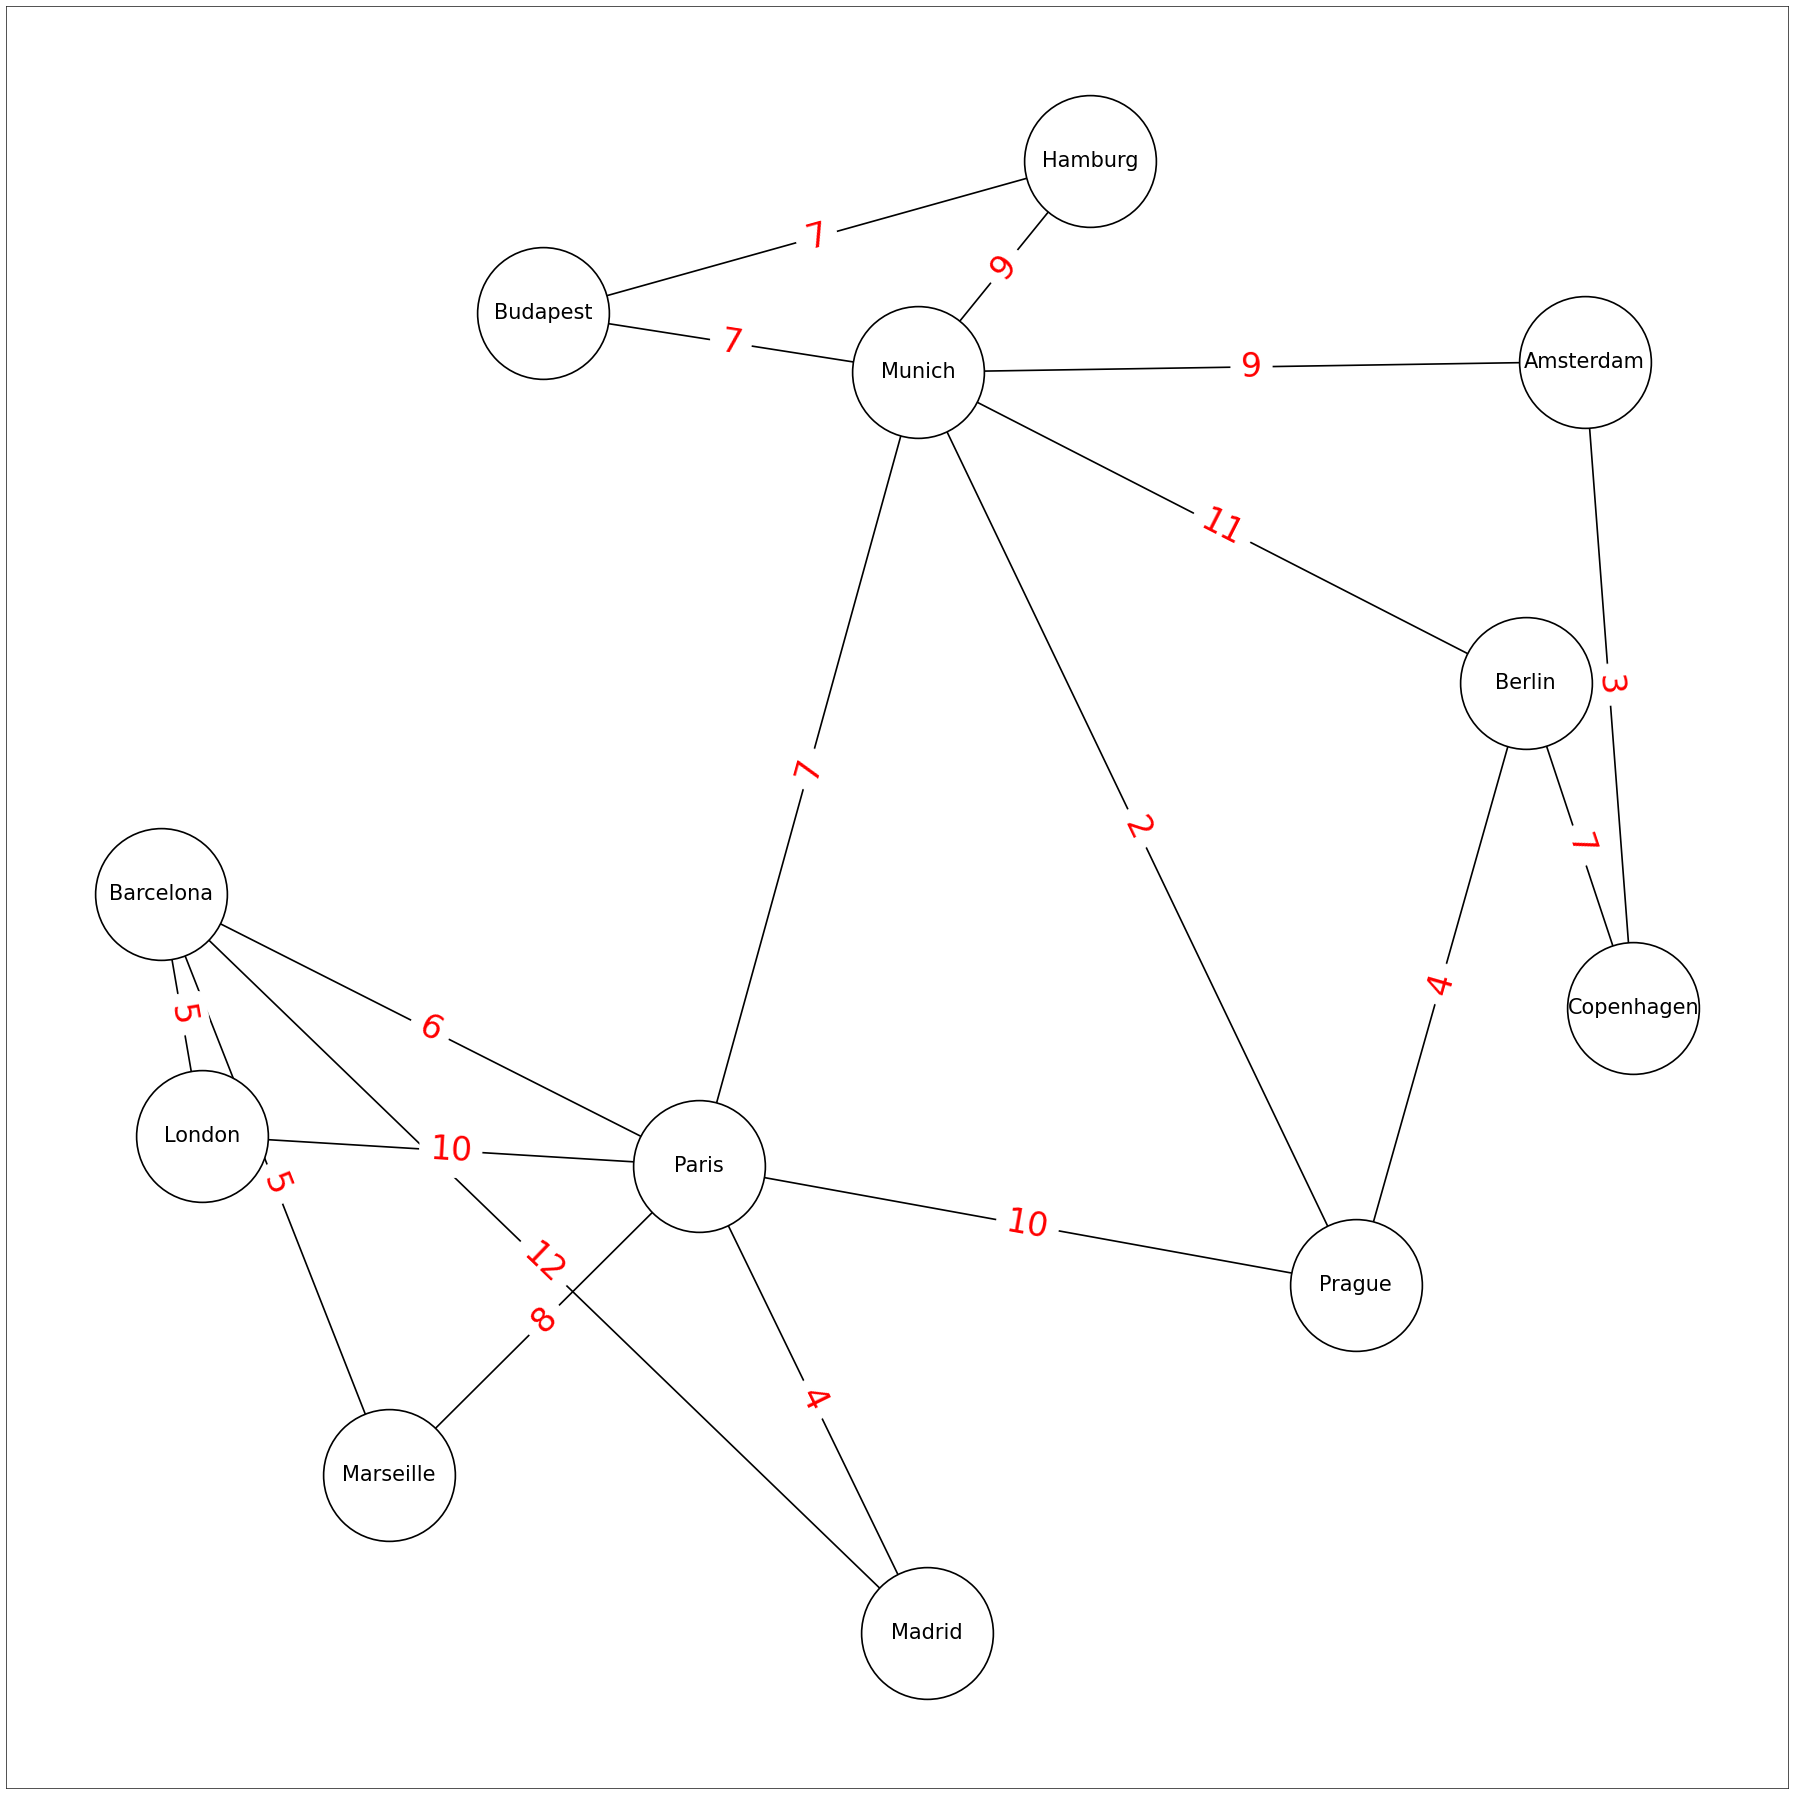

In [13]:
# Testing cell - Do not alter.

edges = [
    ('Barcelona', 'Madrid', 12),
    ('Barcelona', 'Marseille', 5),
    ('Barcelona', 'Paris', 6),
    ('Barcelona', 'London', 5),
    ('Madrid', 'Paris', 4),
    ('Marseille', 'Paris', 8),
    ('London', 'Paris', 10),
    ('Paris', 'Munich', 7),
    ('Paris', 'Prague', 10),
    ('Prague', 'Berlin', 4),
    ('Prague', 'Munich', 2),
    ('Berlin', 'Munich', 11),
    ('Munich', 'Amsterdam', 9),
    ('Hamburg', 'Munich', 9),
    ('Budapest', 'Munich', 7),
    ('Hamburg', 'Budapest', 7),
    ('Copenhagen', 'Amsterdam', 3),
    ('Berlin', 'Copenhagen', 7),
]

# Visible tests to check your code

# checking if all data is ok
graph = create_graph(edges)
print(f'test1 - is a undirected networkx graph? {isinstance(graph, nx.Graph)}')
print(f'test2 - all nodes are correct? {utils.check_graph_nodes(edges, graph)}')
print(f'test3 - all edges are correct? {utils.check_graph_edges(edges, graph)}')
print(f'test4 - all labels are correct? {utils.check_graph_labels(edges, graph)}')

# visualising the graph to check it looks ok!
_ = utils.draw_travel_undirected(graph)


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 1B</h3>
    
<b>Challenge:</b> Write a function to calculate the graph density for a given graph. 
    
- [ ] Input: graph [networkx.Graph]
- [ ] Ouput: density [float]

Graph density is defined as (number of edges) / (possible edges) for a given graph.<br>
Check back to the week 3 lectures if needed!

</div>

In [14]:
# -- GRADED CELL (2 marks) - complete this cell --

def graph_density(graph):
    '''
    Calculates density for a graph according to (num edges) / (possible edges)
    '''
    # YOUR CODE HERE
    # Extracting all edges in the graph
    num_edges = len(graph.edges())

    # Extracting the number of nodes in the graph
    # Possible edges in an undirected graph is nC2
    n = len(graph.nodes())
    possible_edges = n * (n-1) / 2

    # Calculation formula for graph density
    calc = num_edges / possible_edges

    return calc


In [15]:
# extra code cell for development if needed


In [16]:
# Testing cell - Do not alter.

# Visible tests to check your code

# test1: travel graph density
graph = pickle.load(open(TRAVEL_UNGRAPH_FILEPATH, 'rb'))
print(f'test1: expected=0.27, actual={graph_density(graph):0.2f}') 

# test2: random graph density
graph = nx.random_regular_graph(n=12, d=6, seed=1)
print(f'test2: expected=0.55, actual={graph_density(graph):0.2f}') 



test1: expected=0.27, actual=0.27
test2: expected=0.55, actual=0.55


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 1C</h3>
    
<b>Challenge:</b> Write a function to calculate the average degree of nodes in a graph. 
    
- [ ] Input: graph [networkx.Graph]
- [ ] Ouput: average degree [float]

Look back at lectures if needed. 
    
</div>

In [17]:
# -- GRADED CELL (2 marks) - complete this cell --

def average_degree(graph):
    '''
    Calculates the average degree of nodes in a graph. 
    '''
    # YOUR CODE HERE
    
    # Extracting total number of nodes
    node = list(graph.nodes())
    num_nodes = len(node)

    # Creating a variable for sum of all the nodes degree
    sum_nodes_deg = 0

    # Iterating through each node in the graph
    # Extracting the total number of edges it has
    # Keep adding to the sum_nodes_deg
    for i in range(num_nodes):
        sum_nodes_deg += len(graph.edges(node[i]))

    # Calculation formula for average degree of nodes
    calc = sum_nodes_deg / num_nodes

    return calc

In [18]:
# extra code cell for development if needed


In [19]:
# Testing cell - Do not alter.

# Visible tests to check your code

# test1
graph = pickle.load(open(TRAVEL_UNGRAPH_FILEPATH, 'rb'))
print(f'test1: expected=3.00, actual={average_degree(graph):0.2f}')

# test2
graph = nx.erdos_renyi_graph(n=50, p=0.05, seed=1)
print(f'test2: expected=2.68, actual={average_degree(graph):0.2f}')


test1: expected=3.00, actual=3.00
test2: expected=2.68, actual=2.68


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 1D</h3>
    
<b>Challenge:</b> Write a function to calculate the local clustering coefficient for a given node in the graph. 
    
- [ ] Input: node [str], graph [networkx.Graph]
- [ ] Ouput: local clustering coefficient [float]

Local clustering coefficient for a given node is defined as:
    
- the actual number of edges between the node's neighbors, divided by
- the maximum possible number of edges between the node's neighbors 
    
Check back to the week 3 lectures if needed!
    
</div>

In [20]:
# -- GRADED CELL (2 marks) - complete this cell --

def local_clustering_coefficient(node, graph):
    '''
    Calculates the local clustering coefficient for a node in a networkx.Graph.
    '''
    # YOUR CODE HERE
    
    # Extract the number of neighbor nodes od a node
    neighbors = list(graph.neighbors(node))
    k = len(neighbors)

    # Number of edges in between the neighbors, putting into set to make it unique
    numedge_neigh = set()

    # Iterating the neighbor nodes
    # We want to get the edges exist in between the neighbors and put it into the set
    for i in neighbors:
        edges = [(min(v), max(v)) for v in graph.edges(i) if min(v) in neighbors and max(v) in neighbors]
        numedge_neigh.update(edges)

    # Calculate formula for the local clustering coefficient 
    calc = 2 * len(numedge_neigh) / (k * (k-1))

    return calc

In [21]:
# extra code cell for development if needed


In [22]:
# Testing cell - Do not alter.

# Visible tests to check your code
graph = pickle.load(open(TRAVEL_UNGRAPH_FILEPATH, 'rb'))

# test1: Munich
print(f'test1: expected=0.20, actual={local_clustering_coefficient("Munich", graph):0.2f}')

# test2: Paris
print(f'test2: expected=0.27, actual={local_clustering_coefficient("Paris", graph):0.2f}')


test1: expected=0.20, actual=0.20
test2: expected=0.27, actual=0.27


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 1E</h3>
    
<b>Challenge:</b> Greedy traversal 

Pretend you will go travelling to europe for a holiday.<br> 
    
There are lots of cities in europe, and lots of "fun" things to do when travelling between two cities. 
    
So that you can plan your trip, you have created a ***directed*** networkx DiGraph, where ***nodes*** are "cities", and ***edge labels*** represent the amount of "fun" things you can do between those cities. 
    
To help you plan the trip, you will write a function which can traverse between any two cities. <br>
You decide to take a ***greedy*** approach. <br>
For a given city, the next city to visit is the one with largest number of "fun" things along the way. 

Write a python function to traverse between two cities, picking a route which has the most "fun" as possible along the way.
Return a list of cities visited, including the "start" and "end" city.
    
       
- [ ] Input: start [str], end [str], graph [networkx.DiGraph]
- [ ] Ouput: list of visited cities [list[str]]; "fun" score [int]
- [ ] Return value should be a tuple of (city list, fun score)
- [ ] If a cycle is encountered (visiting a city you have already visited), return None.


Remember that for a given ***node***, you can access its ***edges*** to surrounding nodes using `graph.edges(node, data=True)`. 

The number of "fun" things to do is stored as `'label'` in the edge data. 
    
</div>

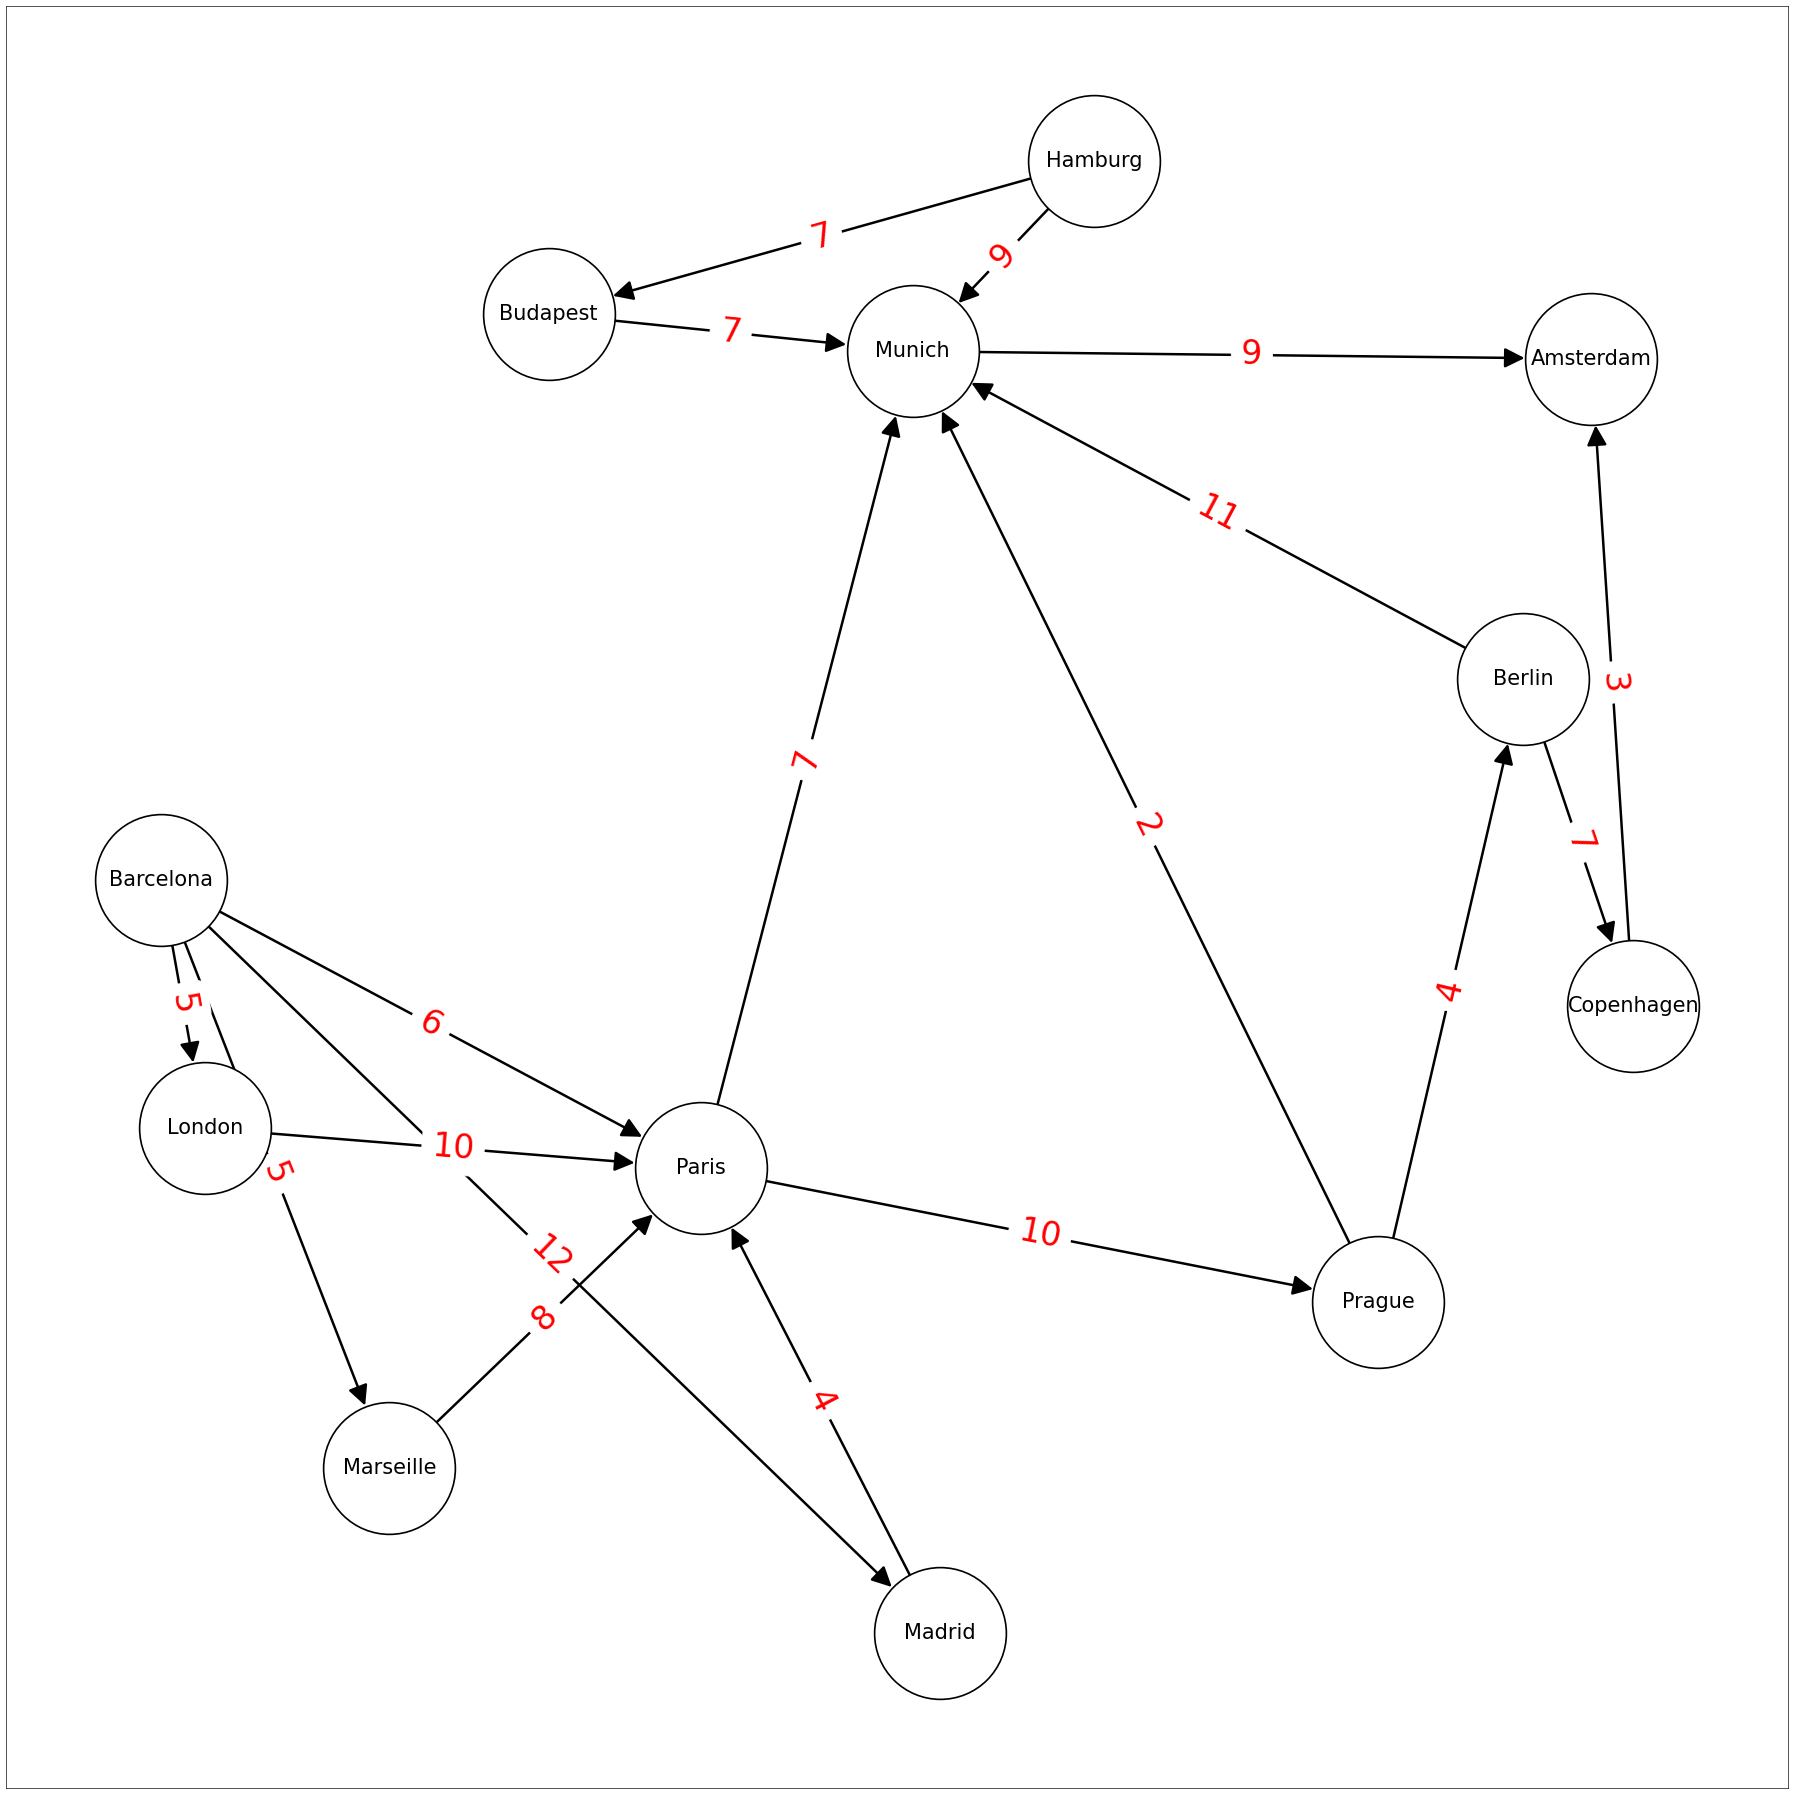

In [23]:
# displays the directed graph for your reference
pos = pickle.load(open(TRAVEL_POSITIONS_FILEPATH, 'rb'))
graph = pickle.load(open(TRAVEL_DIGRAPH_FILEPATH, 'rb'))
_ = utils.draw_travel_directed(graph, pos)

In [79]:
### TAKE HOME EXAM --- Numpang ###
graph = pickle.load(open(TRAVEL_DIGRAPH_FILEPATH, 'rb'))

def identify_ffloop_origins(graph):
    ori_nodes = []
    
    for node in graph:
        visited = []
        current_path = []
        
        if DFS(graph, node, node, 1, visited, current_path):
            if node not in ori_nodes:
                ori_nodes.append(node)

    return ori_nodes


def DFS(graph, current_node, start_node, depth, visited, current_path):
    
    if depth < 6:
        if current_node not in visited:
            visited.append(current_node)
            current_path.append(current_node)

    neighbors = list(graph.neighbors(current_node))

    for neighbor in neighbors:
        predecessor = list(graph.predecessors(current_node))

        if len(current_path)>2 and start_node in predecessor and current_path[-2] != start_node:
            return True

        if neighbor not in visited:
            if DFS(graph, neighbor, start_node, depth+1, visited, current_path):
                return True

    current_path.pop(-1)

    return False

print(identify_ffloop_origins(graph))

['Barcelona', 'Prague']


In [24]:
# -- GRADED CELL (2 marks) - complete this cell --

def greedy_traversal(start, end, graph):
    '''
    Does greedy traversal from a "start" node to an "end" node given a networkx.Graph.
    Returns list of visitied nodes. 
    '''
    # YOUR CODE HERE
    # If the start node and end node is the same then there is no path (return None)
    if start == end:
        return None

    # Create queue list for a temporary node that is going to be traversed
    # Create visited list for cities that are visited
    # Create max_score for the maximum score it gets when traversing the cities
    queue = []
    visited = []
    max_score = 0

    # Append the start node to the queue and visited list as the first node to traverse
    visited.append(start)
    queue.append(start)

    # While the queue is not empty
    while len(queue) > 0:

        # The node to traverse is the one in queue, so we pop that out and store in node
        # Extract possible edges for that node
        # Create a distance variable to allow comparing which edge has most fun score
        # Create a picked_city variable for storing city that has the most fun score
        node = queue.pop(0)
        edge = list(graph.edges(node, data=True))
        dist = 0
        picked_city = ''

        # Iterating through the each possible edges of the node
        # Extract the neighbor node and the score between the node and the neighbor node
        for city in range(len(edge)):
            neighbor = edge[city][1]
            score = edge[city][2]['label']

            # If the score between the node and the neighbor node is bigger than distance
            # Replace the picked city with the neighbor node and the distance with the score
            if score > dist:
                dist = score
                picked_city = neighbor

        # If the picked_city is the end node
        # Update the city to the visited list
        # Add the max_score with the distance
        # Break the loop
        if picked_city == end:
            visited.append(picked_city)
            max_score += dist
            break

        # If the picked_city is not the end node and has not been visited 
        # Update the city to the visited and queue list
        # Add the max_score with the distance
        else:
            if picked_city not in visited:
                visited.append(picked_city)
                queue.append(picked_city)
                max_score += dist
            
            # If picked city has been visited then return None cuz it creates a loop
            else:
                return None

    # Create an output list and append the visited cities and max_score
    output = list()
    output.append(visited)
    output.append(max_score)

    # Return the output
    return output

In [25]:
# extra code cell for development if needed


In [26]:
# Testing cell - Do not alter.

# Visible tests to check your code
graph = pickle.load(open(TRAVEL_DIGRAPH_FILEPATH, 'rb'))

# test1: Prague -> Munich
print('\nTest1: Prague -> Munich')
visited, score = greedy_traversal("Prague", "Munich", graph)
print('--- expected ---')
print('score: 15')
print("order: ['Prague', 'Berlin', 'Munich']")
print('--- actual ---')
print(f'score: {score}')
print(f'order: {visited}')

# test2: Barcelona -> Amsterdam
print('\nTest2: Barcelona -> Amsterdam')
visited, score = greedy_traversal("Barcelona", "Amsterdam", graph)
print('--- expected ---')
print('score: 50')
print("order: ['Barcelona', 'Madrid', 'Paris', 'Prague', 'Berlin', 'Munich', 'Amsterdam']")
print('--- actual ---')
print(f'score: {score}')
print(f'order: {visited}')



Test1: Prague -> Munich
--- expected ---
score: 15
order: ['Prague', 'Berlin', 'Munich']
--- actual ---
score: 15
order: ['Prague', 'Berlin', 'Munich']

Test2: Barcelona -> Amsterdam
--- expected ---
score: 50
order: ['Barcelona', 'Madrid', 'Paris', 'Prague', 'Berlin', 'Munich', 'Amsterdam']
--- actual ---
score: 50
order: ['Barcelona', 'Madrid', 'Paris', 'Prague', 'Berlin', 'Munich', 'Amsterdam']


<div style="background: rgb(255,165,0); border: solid 1px rgb(129,199,132); padding: 10px;">    

<h1>QUESTION 2</h1>

</div>

## Brief 

In this Question we will explore suffix tries. 

We will start by traversing the trie, then will lookup substrings & suffixes in the trie, then will add a new suffix. <br>
To finish, there is a challenging task which performs inexact substring lookup. 

A pre-built suffix trie, built from the string `"abaaba$"` is provided.<br>
This suffix trie is a directed networkx.DiGraph. 

The root node in the trie is called `"root"`, and all other nodes have unique integer values which ***are not relevant.*** <br>
The edges in the trie store suffix characters. 

You can assume the terminator character is always `"$"`.


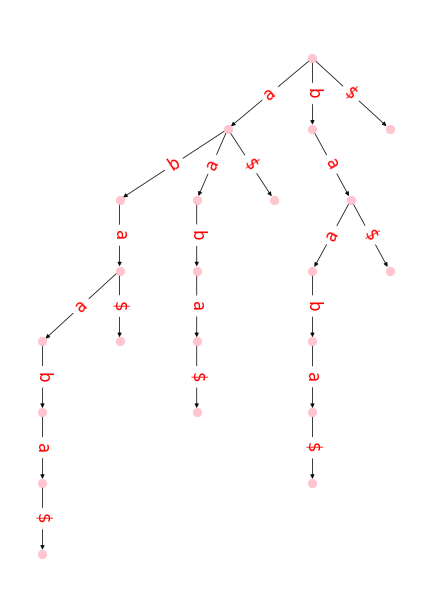

In [27]:
# suffix trie for this question
trie = pickle.load(open(SUFFIX_TRIE_FILEPATH, 'rb'))
_ = utils.draw_suffix_trie(trie)

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 2A</h3>
    
<b>Challenge:</b> Write a function which will traverse down the trie 1 step.  
    
- [ ] Input: node [str or int], label [str], trie [networkx.DiGraph]
- [ ] Ouput: child node [str]
- [ ] If there is no valid child node, return None.

To traverse down, you will need to get the edges from `node`, then for each edge check if the `"label"` for that edge is the query label. 

</div>

In [28]:
# -- GRADED CELL (2 marks) - complete this cell --

def get_child(node, label, trie):
    """
    For a given node, explores its edges to find whether an edge exists with the given label.
    If it does, returns the connected node. Else, returns None.
    """
    # YOUR CODE HERE
    # make a list of possible edges of a node with its corresponding label
    edges = list(trie.edges(node, data=True))

    # For every edge in the node
    # We want to iterate and find if the given label exists
    # If it exists then return the child node
    for i in range(len(edges)):
        if label == edges[i][2]['label']:
            return edges[i][1]
        else:
            continue

    # Otherwise return None, means it is not in the trie
    return None

In [29]:
# extra code cell for development if needed


In [30]:
# Testing cell - Do not alter.

# Visible tests to check your code
trie = pickle.load(open(SUFFIX_TRIE_FILEPATH, 'rb'))

# test1: get child from "root" node if edge labelled "$"
print(f"test1: expected=21, actual={get_child('root', '$', trie)}")

# test2: get child from "root" node if edge labelled "b"
print(f"test2: expected=8, actual={get_child('root', 'b', trie)}")

# test3: get child from internal node (8) if edge labelled "a"
print(f"test3: expected=9, actual={get_child(8, 'a', trie)}")


test1: expected=21, actual=21
test2: expected=8, actual=8
test3: expected=9, actual=9


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 2B</h3>
    
<b>Challenge:</b> Write a function to check whether a substring is in the trie. 
    
- [ ] Input: substring [str], trie [networkx.DiGraph]
- [ ] Ouput: True or False [bool]

Use your `get_child` function from Q2A to help you traverse the trie. 

</div>

In [31]:
# -- GRADED CELL (2 marks) - complete this cell --

def has_substring(substring, trie):
    """
    returns whether a given substring is present in the suffix trie [graph].
    """
    node = 'root'
    
    # YOUR CODE HERE
    index = 0

    # Iterating each character of the substring
    while index < len(substring):

        # If there is a child node from node to substring's character, it will return a value
        child = get_child(node, substring[index], trie)

        # If there is a child node,
        # Making the child node as the node now to traverse 1 step forward
        # Add the pointer by 1
        if child != None:
            node = child
            index += 1
        
        # If there is no value, then it will return False
        # Means the substring is not in the trie
        else:
            return False

    # Otherwise return True
    return True

In [32]:
# extra code cell for development if needed


In [33]:
# Testing cell - Do not alter.

# Visible tests to check your code
trie = pickle.load(open(SUFFIX_TRIE_FILEPATH, 'rb'))

# test1: "aba"
print(f"test1: expected=True, actual={has_substring('aba', trie)}")

# test2: "baab"
print(f"test2: expected=True, actual={has_substring('baab', trie)}")

# test3: "bbab"
print(f"test3: expected=False, actual={has_substring('bbab', trie)}")


test1: expected=True, actual=True
test2: expected=True, actual=True
test3: expected=False, actual=False


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 2C</h3>
    
<b>Challenge:</b> Write a function to check whether a suffix is in the trie. 
    
- [ ] Input: suffix [str], trie [networkx.DiGraph]
- [ ] Ouput: True or False [bool]

Use your `get_child` function from Q2A to help you traverse the trie.

</div>

In [34]:
# -- GRADED CELL (2 marks) - complete this cell --

def has_suffix(suffix, trie):
    """
    returns whether a given suffix is present in the suffix trie.
    """
    node = 'root'
    
    # YOUR CODE HERE
    # Add the suffix by $ as a sign of termination in the trie
    suffix += '$'
    index = 0

    # Iterating each character of the suffix
    while index < len(suffix):
        
        # If there is a child node from node to suffix's character, it will return a value
        child = get_child(node, suffix[index], trie)

        # If the value is not None then the child node becomes the current node
        # Traversing down the trie by 1 step
        # Adding the index by 1
        if child != None:
            node = child
            index += 1

        # If there is no value, then it will return False
        # Means the suffix is not in the trie
        else:
            return False
    
    # Otherwise return True
    return True


In [35]:
# extra code cell for development if needed


In [36]:
# Testing cell - Do not alter.

# Visible tests to check your code
graph = pickle.load(open(SUFFIX_TRIE_FILEPATH, 'rb'))

# test1: "aba"
print(f"test1: expected=True, actual={has_suffix('aba', graph)}")

# test2: "aab"
print(f"test2: expected=False, actual={has_suffix('aab', graph)}")

# test3: "abaaba"
print(f"test3: expected=True, actual={has_suffix('abaaba', graph)}")


test1: expected=True, actual=True
test2: expected=False, actual=False
test3: expected=True, actual=True


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 2D</h3>
    
<b>Challenge:</b> Write a function to add a new suffix to the trie. 
    
- [ ] Input: suffix [str], trie [networkx.DiGraph]
- [ ] Ouput: updated trie [networkx.DiGraph]

Assume the terminator character "$" will always be provided in the suffix to add. 
    
</div>

In [37]:
# -- GRADED CELL (2 marks) - complete this cell --

def add_suffix(suffix, trie):
    """
    Adds a new suffix to the suffix trie. 
    Trie represented as at networkx.DiGraph. 
    """
    node = 'root'
    
    # YOUR CODE HERE
    # create a pointer
    i=0

    # Iterating each character of the suffix
    while i < len(suffix):

        # Extracting edges, total number of nodes in the trie
        edges = list(trie.edges(node, data=True))
        node_num = trie.number_of_nodes()

        # If there is a child node from node to suffix's character, it will return a value
        child = get_child(node, suffix[i], trie)

        # If there is a child node,
        # Making the child node as the node now to traverse 1 step forward
        # Add the pointer by 1
        if child != None:
            node = child
            i += 1
        
        # If there is no child node then add an edge with the character
        # Add a node number by 1 so we have a label for the node
        else:
            node_num += 1
            trie.add_edge(node, node_num, label=suffix[i])

    return trie

In [38]:
# extra code cell for development if needed



Single test: adding "abaabc$"


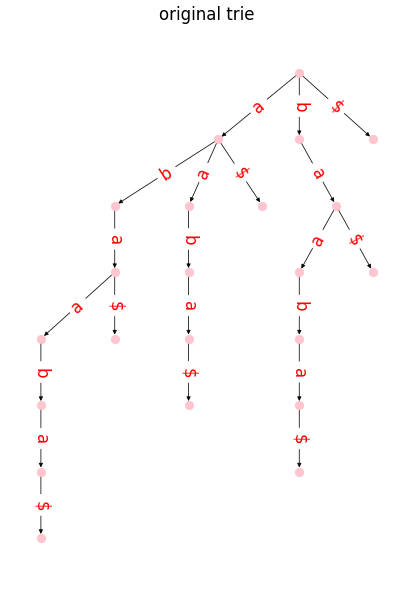

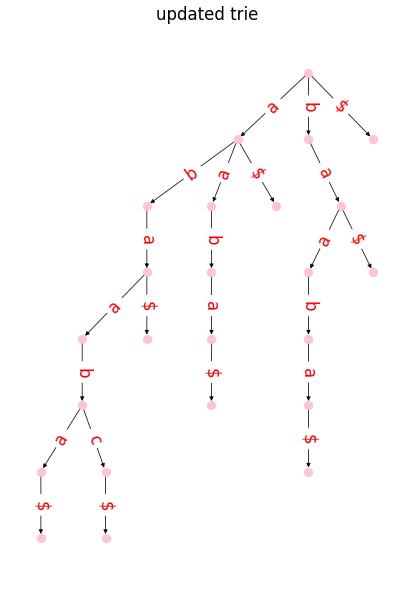

In [39]:
# Testing cell - Do not alter.

# Visible tests to check your code

# single test: adding "abaabc$"
print('\nSingle test: adding "abaabc$"')
trie = pickle.load(open(SUFFIX_TRIE_FILEPATH, 'rb'))
utils.draw_suffix_trie(trie, title='original trie')
graph = add_suffix('abaabc$', trie)
utils.draw_suffix_trie(trie, title='updated trie')



<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 2E</h3>
    
<b>Challenge:</b> Write a function to check whether a substring is in the trie, allowing up to a certain number of mismatches. 
    
- [ ] Input: substring [str], max mismatches [int], graph [networkx.DiGraph]
- [ ] Ouput: True or False [bool]

This question is harder than it looks. 

</div>

In [40]:

# -- GRADED CELL (2 marks) - complete this cell --

def has_substring_lenient(substring, max_mismatches, trie):
    """
    returns whether a given substring is present in the suffix trie.
    allows up to [max_mismatches] mismatches between the substring and the trie. 
    """
    node = 'root'
    
    # YOUR CODE HERE
    # Create variables for temporary storing
    poss_substr = ''
    mismatch = 0
    
    # Create a while loop
    i = 0
    while i < len(substring):
    
        # If mismatch is not equal to max_mismatches yet,
        # Do extract the edges of the node and get_child
        if mismatch < max_mismatches+1:
            edges = list(trie.edges(node, data = True))
            child = get_child(node, substring[i], trie)
    
            # If get_child returns a value,
            # Concatenate the character to poss_substr
            # Traverse down by 1 node
            if child != None:
                poss_substr += substring[i]
                node = child
    
            # Else, add mismatch by 1
            # Store the edges of the node and do dfs for each edges to check if they are the same for the following characters
            # If don't match then recurse the code
            # If matches then traverse down that line and return True
            else:
                mismatch += 1 
                
                next_nodes = []
                label = []
                for j in range(len(edges)):
                    next_nodes.append(edges[j][1]['label'])
                    label.append(edges[j][2]['label'])
    
                    # dfs
    
                
        else:
            break
            return False
            
        i+=1
    return True



In [41]:
# extra code cell for development if needed


In [42]:
# Testing cell - Do not alter.

# Visible tests to check your code
trie = pickle.load(open(SUFFIX_TRIE_FILEPATH, 'rb'))

# tests
print(f"test1: expected=True, actual={has_substring_lenient('aba', 0, trie)}")
print(f"test2: expected=True, actual={has_substring_lenient('baab', 0, trie)}")
print(f"test3: expected=False, actual={has_substring_lenient('bbab', 0, trie)}")
print(f"test4: expected=True, actual={has_substring_lenient('bbab', 1, trie)}")
print(f"test5: expected=True, actual={has_substring_lenient('bbbb', 2, trie)}")
print(f"test6: expected=True, actual={has_substring_lenient('bbaa', 1, trie)}")
print(f"test7: expected=False, actual={has_substring_lenient('aaaa', 0, trie)}")


test1: expected=True, actual=True
test2: expected=True, actual=True


TypeError: 'int' object is not subscriptable

<div style="background: rgb(255,165,0); border: solid 1px rgb(129,199,132); padding: 10px;">    

<h1>QUESTION 3</h1>

</div>

## Brief 

In this question we will look at part of the baker's yeast Protein-Protein-Interaction network, taken from the [STRING database](https://string-db.org/). 

We will do some basic queries and calculate graph metrics, then will use the output to try and categorise the network. 

Some information about the PPI network used in question 3:
- The graph is undirected
- Nodes are proteins
- Edges represent a protein-protein interaction
- Edges are unlabelled.



<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 3A</h3>
    
<b>Challenge:</b> Write a function which returns whether there is an interaction between two proteins. 
    
- [ ] Input: protein1 [str], protein2 [str], graph [networkx.Graph]
- [ ] Ouput: True or False [bool]

</div>

In [43]:
# -- GRADED CELL (1 marks) - complete this cell --

def has_interaction(protein1, protein2, graph):
    """
    returns whether there is an interaction between two proteins. 
    """
    # YOUR CODE HERE
    # Look at all the edges in the graph
    edges = list(graph.edges())

    # If edge between protein1 and protein2 are found in the graph then return True
    if (protein1, protein2) in edges or (protein2, protein1) in edges:
        return True
    
    # Otherwise return False, proteins are not related
    else:
        return False


In [44]:
# extra code cell for development if needed


In [45]:
# Testing cell - Do not alter.

# Visible tests to check your code
ppi_network = pickle.load(open(PPI_NETWORK_FILEPATH, 'rb'))

# test1: YCR051W - YDL223C
print(f'test1: expected=True, actual={has_interaction("YCR051W", "YDL223C", ppi_network)}')

# test2: YCR051W - YJL052W
print(f'test2: expected=False, actual={has_interaction("YCR051W", "YJL052W", ppi_network)}')


test1: expected=True, actual=True
test2: expected=False, actual=False


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 3B</h3>
    
<b>Challenge:</b> Write a function which returns the top 5 protein names with highest degree.
    
The nodes in this PPI network are proteins.<br>
As this is a PPI, these high-degree proteins are likely kinases, or other types which have many interaction targets. 
    
- [ ] Input: graph [networkx.Graph]
- [ ] Ouput: list of protein symbols[list]

The returned protein list does not need to be ordered in any way. 

</div>

In [46]:
# -- GRADED CELL (1 marks) - complete this cell --

def top_degree_proteins(graph):
    """
    Returns top 5 nodes with highest degree in a networkx.Graph.
    """
    # YOUR CODE HERE
    # Extract all nodes in the graph
    # Make an empty list for storing the node with its degree
    nodes = list(graph.nodes())
    node_n_deg = []

    # For every node, put the in a tuple with its total number of edges
    # Append it to the node_n_deg list
    for node in nodes:
        degree = (node, len(list(graph.edges(node))))
        node_n_deg.append(degree)

    # Sorted the node based on the degree from highest to lowest
    sorted_deg = sorted(node_n_deg, key=lambda x: x[1], reverse=True)

    # Picked 5 nodes with the highest degree and store it in high_deg
    high_deg = [sorted_deg[x][0] for x in range(5)]

    # Return the high_deg
    return high_deg


In [47]:
# extra code cell for development if needed
   

In [48]:
# Testing cell - Do not alter.

# Visible tests to check your code
ppi_network = pickle.load(open(PPI_NETWORK_FILEPATH, 'rb'))
proteins = top_degree_proteins(ppi_network)

# single test: 
print(f"expected: ['YNL202W', 'YLR414C', 'YKL055C', 'YGL151W', 'Q0010']")
print(f"actual:   {proteins}")


expected: ['YNL202W', 'YLR414C', 'YKL055C', 'YGL151W', 'Q0010']
actual:   ['Q0010', 'YKL055C', 'YNL202W', 'YGL151W', 'YLR414C']


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 3C</h3>
    
<b>Challenge:</b> Write a function to calculate the global clustering coefficient (gcc) and average shortest path length (apl) for a graph.
    
- [ ] Input: graph [networkx.Graph]
- [ ] Ouput: tuple of (gcc, apl)
    
Glocal clustering coefficient is also sometimes referred to as average clustering coefficient for a graph. 

Some networkx functions which may be useful in this question:
- networkx.average_clustering(G)
- networkx.shortest_path_length(G)
- networkx.average_shortest_path_length(G)
- networkx.connected_components(G)
    
Your function should take about 5 - 10 seconds to run. 

</div>

In [49]:
# -- GRADED CELL (1 marks) - complete this cell --

def graph_metrics(graph):
    """
    calculates the global clustering coefficient (gcc) and average shortest path length (apl) for a graph.
    return value is a tuple of (gcc, apl)
    """
    # YOUR CODE HERE

    apl = nx.average_shortest_path_length(graph)

    # As per networkx documentation the average_clustering() is the sum of all local
    # clustering divided by its number of nodes. Based on wikipedia, average_clustering
    # is the alternative of global clustering coefficient
    gcc = nx.average_clustering(graph)
    
    return gcc, apl


In [50]:
# extra code cell for development if needed


In [51]:
# Testing cell - Do not alter.

# Visible tests to check your code
ppi_network = pickle.load(open(PPI_NETWORK_FILEPATH, 'rb'))

# single test
gcc, apl = graph_metrics(ppi_network)
print(f'\ntest1: expected=(0.58, 1.92), actual=({gcc:0.2f}, {apl:0.2f})')



test1: expected=(0.58, 1.92), actual=(0.58, 1.92)



### Question 3D (short answer)

(1 marks, max 50 words)

<div class="alert alert-info">

What is one graph metric discussed in the lectures which could inform on whether a protein forms part of a complex?
    
</div>



<span style="color:rgb(17, 122, 121); font-family:Courier"><i><b># -- GRADED CELL (1 marks) - complete this cell --</b></i></span>

YOUR ANSWER HERE



Sankoff algorithm


### Question 3E (short answer)

(2 marks, max 50 words)

<div class="alert alert-info">

The yeast PPI network in this question seems to be a hybrid of two network types. <br>
(Run the cell below to use your graph_metrics() function to calculate metrics for graphs of different types).
    
- Which two types is it similar to? (1 mark)
- Can you think of a biological reason why these two types are seen? (1 mark)

Hint: Think about the different interactions which would be in a PPI network. 

</div>



In [52]:
ppi_network = pickle.load(open(PPI_NETWORK_FILEPATH, 'rb'))
g_regular = nx.random_regular_graph(n=1000, d=5, seed=1)
g_random = nx.erdos_renyi_graph(n=1000, p=0.18, seed=1)
g_smallworld = nx.watts_strogatz_graph(n=1000, k=8, p=0.05, seed=1)
g_scalefree = nx.barabasi_albert_graph(n=1000, m=5, seed=1)

print('(gcc=global clustering coefficient)')
print('(apl=average shortest path length)\n')
gcc, apl = graph_metrics(ppi_network)
print(f'our PPI network: gcc={gcc:0.3f}, apl={apl:0.3f}')
gcc, apl = graph_metrics(g_regular)
print(f'\nregular: gcc={gcc:0.3f}, apl={apl:0.3f}')
gcc, apl = graph_metrics(g_random)
print(f'random: gcc={gcc:0.3f}, apl={apl:0.3f}')
gcc, apl = graph_metrics(g_smallworld)
print(f'smallworld: gcc={gcc:0.3f}, apl={apl:0.3f}')
gcc, apl = graph_metrics(g_scalefree)
print(f'scalefree: gcc={gcc:0.3f}, apl={apl:0.3f}')


(gcc=global clustering coefficient)
(apl=average shortest path length)

our PPI network: gcc=0.580, apl=1.923

regular: gcc=0.004, apl=4.706
random: gcc=0.180, apl=1.820
smallworld: gcc=0.553, apl=6.111
scalefree: gcc=0.034, apl=3.010


<span style="color:rgb(17, 122, 121); font-family:Courier"><i><b># -- GRADED CELL (1 marks) - complete this cell --</b></i></span>

YOUR ANSWER HERE



Small world and random.
Because protein networks and mutations are random and highly connected.

<div style="background: rgb(255,165,0); border: solid 1px rgb(129,199,132); padding: 10px;">    

<h1>QUESTION 4</h1>

</div>

## Brief 


### Overview 

In the final question we will implement UPGMA agglomerative clustering for phlogenetic tree building. 

Our sample will be toy example of a handful of small sequences, but the approach can be applied to large datasets with long sequences. 

In this question:

- We will use ***kmer distance*** to calculate initial distances between the sequences. 
- We will use a ***single distance matrix*** which is updated at each iteration. 
- We will use ***proportional average distance*** to update the distance matrix. 
- The tree we will build should be ***ultrametric***.

The distance matrix used will be a python dictionary. The following is an example:

```
dist_matrix = {
    'A': {'A': 0, 'B': 2, 'C': 8},
    'B': {'A': 2, 'B': 0, 'C': 2},
    'C': {'A': 8, 'B': 2, 'C': 0},
}

```

<br>

### Distance updates 


We will update the matrix according to ***proportional average distance***.


<img style="float: left; width:100%; max-width:300px;" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1765de5e50468564c5231dae3114cb2086784626">

<br clear="left"/>

Where: 
- `A` and `B` are the clusters to merge
- `X` is another cluster. we wish to update the matrix with a new dist `AB` -> `X`.
- `|A|` is the number of items in cluster A
- `|B|` is the number of items in cluster B
- `d(A,X)` is the distance from cluster A to another cluster X 
- `d(B,X)` is the distance from cluster B to another cluster X


<br>

### Validity of Proportional Avg. Dist and a Single Matrix

In this question, we will use a ***single distance matrix*** which gets updated after each cluster merge.

This implementation is slightly different from the lectures.

In the lectures, it was mentioned that you use both an initial distance matrix, and another distance matrix which is updated. 

***This is not necessary.*** Only a single distance matrix is needed. See the figure below. 

<img style="float: left; width:100%; max-width:500px;" src="https://github.com/melbournebioinformatics/COMP90014/raw/A2/media/prop_avg_dist.png">

<br clear="left"/>

In the figure above, we will focus on the average distance between cluster `D` and a theoretical cluster `ABC`. 

- In (1): 
    - we show the distance from `D` to each other cluster. 
    - we calculate the distance from `D` to a theoretical cluster `ABC` = 6
- In (2): 
    - we have merged clusters `A` and `B` according to UPGMA.
    - the distances from `D` to other clusters have been updated.
    - we calculate the distance from `D` to a theoretical cluster `ABC` = 6
    - note that this is identical to the distance in (1)
- In (3):
    - we have merged clusters `AB` and `C` according to UPGMA.
    - the distances from `D` to other clusters have been updated.
    - we calculate the distance from `D` to a cluster `ABC` = 6
    - note that this is identical to the distance in (1) and (2)
    
In this manner, only a single distance matrix is needed, as it produces the correct values. 

<br>


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 4A</h3>
    
<b>Challenge:</b> Write a function to intialise a distance matrix as a nested python dictionary. 

The input sequences are a list of tuples, with each tuple as `(name, sequence)`<br>
The keys in the dictionary should be the sequence `name`s, and the values should all be initialised to `0`
    
- [ ] Input: list of (name, sequence) tuples
- [ ] Ouput: dictionary representing distance matrix. 
    
The output dictionary should be structured such that `dict[name1][name2]` = 0 for every pair of sequences. <br>
Ensure the dictionary is a square matrix, such that `dict[name1][name2]` and `dict[name2][name1]` store the same value. 

The `utils.pretty_print_matrix()` function will print your dictionary if it has the correct format. 
</div>

In [53]:
# -- GRADED CELL (2 marks) - complete this cell --

def initialise_dist_matrix(sequences):
    """
    initialises and returns a square distance matrix as a nested python dictionary,
    given a list of (name, sequence) tuples. 
    """
    matrix = {}
    
    # YOUR CODE HERE
    # Create a list to store all the keys in the sequences
    keys = []

    # Iterate the sequences and grabbing all the keys
    # Append the keys to the list
    for seq in range(len(sequences)):
        key = sequences[seq][0]
        keys.append(key)

    # For every key in the list,
    # Add them to the matrix, with nested matrix
    # Put value for each of the keys to 0
    for key in keys:
        if key not in matrix:
            matrix[key] = {}
        for key2 in keys:    
            if key2 not in matrix[key]:
                matrix[key][key2] = 0

    # Return matrix
    return matrix 


In [54]:
# extra code cell for development if needed      
        

In [55]:
# Testing cell - Do not alter.

# Visible tests to check your code

# single test
sequences = [('A', 'GATTATTACA'), ('B', 'GATTATTACG'), ('C', 'GATTAATAGG'), ('D', 'GATTTTTACG'), ('E', 'GTTTAATAGG')]
dist_matrix = initialise_dist_matrix(sequences)
utils.pretty_print_matrix(dist_matrix)


   A  B  C  D  E
A  0  0  0  0  0
B  0  0  0  0  0
C  0  0  0  0  0
D  0  0  0  0  0
E  0  0  0  0  0


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 4B</h3>
    
<b>Challenge:</b> Write a function which populates the distance matrix with values. 
    
To calculate the distance between two sequences, use the supplied `utils.kmer_dist(seq1, seq2, k)` function.
    
- [ ] Input: distance matrix as nested dictionary [dict], list of (name, sequence) tuples [list], k [int]
- [ ] Ouput: updated distance matrix [dict]

</div>

In [56]:
# -- GRADED CELL (2 marks) - complete this cell --

def populate_dist_matrix(dist_matrix, sequences, k=3):
    """
    populates and returns the distance matrix with distance values. 
    distance is calculated using utils.kmer_dist(seq1, seq2, k).
    """
    from A2.utils import kmer_dist
    
    # YOUR CODE HERE
    # Extract all the keys from the sequences
    # Append every key into the list
    keys = []
    for seq in range(len(sequences)):
        key = sequences[seq][0]
        keys.append(key)

    # Extract all the values from the sequences
    # Append every value into the list
    sequence = []
    for seq in range(len(sequences)):
        value = sequences[seq][0]
        sequence.append(value)

    # Iterate the dist_matrix to fill in the distance between 2 keys
    # So when we store the key and values, they retain the indexes from where they come from
    # Utilise the key and value to grab the index and put it into the utils.kmer_dist
    # to calculate distance for us
    # Store it accordingly in the matrix
    for i in dist_matrix:
        for j in dist_matrix[i]:
            seq1_idx = keys.index(i)
            seq2_idx = keys.index(j)
            dist = utils.kmer_dist(sequences[seq1_idx][1], sequences[seq2_idx][1], k)
            dist_matrix[i][j] = dist

    # Return the matrix
    return dist_matrix

In [57]:
# extra code cell for development if needed


In [58]:
# Testing cell - Do not alter.

# Visible tests to check your code

# single test
dist_matrix = initialise_dist_matrix(sequences)
dist_matrix = populate_dist_matrix(dist_matrix, sequences)
utils.pretty_print_matrix(dist_matrix)


    A   B   C   D   E
A   0   2  10   8  14
B   2   0  10   6  14
C  10  10   0  10   4
D   8   6  10   0  12
E  14  14   4  12   0


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 4C</h3>
    
<b>Challenge:</b> Write a function to select the next clusters to merge using the distance matrix. 
    
Now that we have set up the distance matrix, we can start merging clusters. <br>
This function should pick the next two clusters to merge. 

- [ ] Input: distance matrix as nested dictionary [dict] 
- [ ] Ouput: tuple of (c1, c2, dist) [list]

Return a tuple (c1, c2, dist), where:
- c1 = cluster 1 name
- c2 = cluster 2 name
- dist = distance between clusters

</div>

In [59]:
# -- GRADED CELL (1 marks) - complete this cell --

def select_clusters(dist_matrix):
    """
    select the next clusters to merge using the distance matrix. 
    returns (c1, c2, dist).
    """
    # YOUR CODE HERE
    # Create a list for value to store the distances
    # Create a list of tuples consist of (key1, key2, distance)
    value = []
    dist_tuple = []

    # Iterate the dist_matrix to find the distance between 2 keys
    for i in dist_matrix:
        for j in dist_matrix[i]:
            dist = dist_matrix[i][j]

            # Want to get min value and no duplicates so append all the values exist
            # Don't want 0 to be in the list bc it's comparing key to itself
            if dist not in value and dist != 0:
                value.append(dist)

                # store the relevant key1, key2, and its distance in a tuple
                # Append it to the list
                info = (i,j,dist)
                dist_tuple.append(info)

    # Picking the minimum value in the value list
    min_value = min(value)

    # Because when we append the value, we also append the info to the dist_tuple, they have
    # the same index. So we just search the index of the min value and use it to extract
    # the info in the dist_tuple list
    min_idx = value.index(min_value)

    # Return the info of the min value
    return dist_tuple[min_idx]

In [60]:
# extra code cell for development if needed


In [61]:
# Testing cell - Do not alter.

# Visible tests to check your code

# single test
dist_matrix = {
    'A': {'A': 0.0, 'B': 2.0, 'C': 1.0},
    'B': {'A': 2.0, 'B': 0.0, 'C': 5.0},
    'C': {'A': 1.0, 'B': 5.0, 'C': 0.0},
}
c1, c2, dist = select_clusters(dist_matrix)
print(f'expected: c1=A, c2=C, dist=1.0')
print(f'actual:   c1={c1}, c2={c2}, dist={dist}')


expected: c1=A, c2=C, dist=1.0
actual:   c1=A, c2=C, dist=1.0


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 4D</h3>
    
<b>Challenge:</b> Write a function which updates the ultrametric tree with the new internal node and edges. 
    
Once we have selected clusters to merge and obtained their distance, we need to update our ultrametric tree. <br>
A new internal node is created for the new cluster, and edges are created to each cluster being merged. <br>
    
For Question 4 we will use a networkx.DiGraph to represent the tree. <br>
Store the branch lengths as the `'label'` data attribute on tree edges. 

The distance to each cluster is `dist/2`, after taking into consideration the path length from those clusters to the tree leaves. <br>
This keeps the tree ***ultrametric***. 
    
A function to calculate the path length from an internal node to the leaves has been provided. <br>
You can use it like this: `get_branch_length(node, tree)`
    
- [ ] Input: c1 [str]; c2 [str]; distance [float]; newclust [str]; tree [networkx.DiGraph]
- [ ] Ouput: tree [networkx.DiGraph]


</div>

In [62]:
# -- GRADED CELL (2 marks) - complete this cell --

def update_tree(c1, c2, distance, newclust, tree):
    """
    updates and returns a networkx.Graph (ultrametric tree) with the new internal node and edges.
    """
    from A2.utils import get_branch_length
    
    # YOUR CODE HERE
    
    # 4 scenarios:
    # First, tree is empty and c1 and c2 is an individual cluster
    # Second, tree might be filled, but adding c1 which is an individual cluster to the tree
    # Third, tree might be filled, but adding c2 which is an individual cluster to the tree
    # Fourth, both c1 and c2 are merged clusters
    
    if len(c1) == 1 and len(c2) == 1:
        # Add c1, c2, and newclust into the tree
        # Add edge between c1 and newclust, c2 and newclust with the distance = distance/2
        tree.add_node(c1)
        tree.add_node(c2)
        tree.add_node(newclust)
        tree.add_edge(c1, newclust, label = distance/2)
        tree.add_edge(c2, newclust, label = distance/2)

    elif len(c1) == 1:
        # Keep the c2 distance from previous leaf to internal node in edge_dist
        # Add edge between c1 and newclust, c2 and newclust with the distance
        # Distance is different for c2 because it may have previous distance to take into account
        edge_dist = get_branch_length(c2[0], tree)
        tree.add_edge(c1, newclust, label = distance/2)
        tree.add_edge(c2, newclust, label = distance/2 - edge_dist)
    
    elif len(c2) == 1:
        # Keep the c1 distance from previous leaf to internal node in edge_dist
        # Add edge between c1 and newclust, c2 and newclust with the distance
        # Distance is different for c1 because it may have previous distance to take into account
        edge_dist = get_branch_length(c1[0], tree)
        tree.add_edge(c2, newclust, label = distance/2)
        tree.add_edge(c1, newclust, label = distance/2 - edge_dist)
    
    else:
        # Keep both c1 n c2 distance from previous leaf to internal node in edge_dist1, edge_dist2
        # Add edge between c1 and newclust, c2 and newclust with the distance
        # Distance is different for c1 n c2 because it may have previous distance to take into account
        edge_dist1 = get_branch_length(c1[0], tree)
        edge_dist2 = get_branch_length(c2[0], tree)
        tree.add_edge(c1, newclust, label = distance/2 - edge_dist1)
        tree.add_edge(c2, newclust, label = distance/2 - edge_dist2)

    # Return the updated tree
    return tree


In [63]:
# extra code cell for development if needed



--- test1 ---


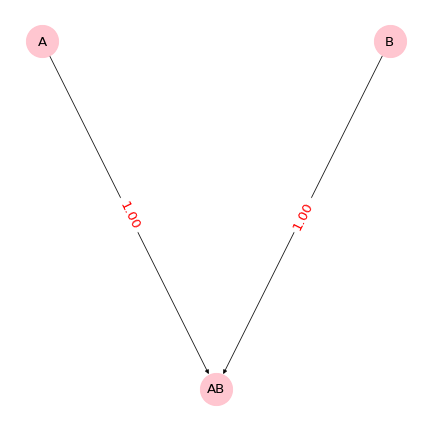


--- test2 ---


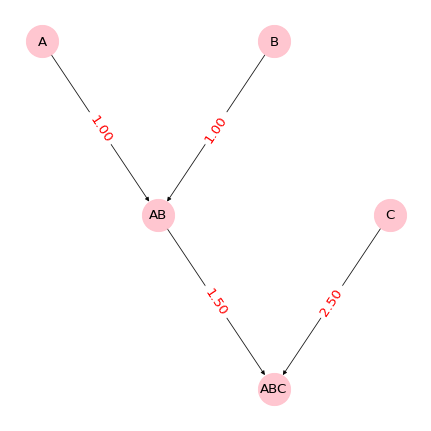

In [64]:
# Testing cell - Do not alter.

# Visible tests to check your code
tree = nx.DiGraph()

# test1: merging A and B
print('\n--- test1 ---')
c1 = 'A'
c2 = 'B'
dist = 2.0
newclust = 'AB'
tree = update_tree(c1, c2, dist, newclust, tree)
utils.draw_evo_tree(tree)

# test2: merging AB and C
print('\n--- test2 ---')
c1 = 'AB'
c2 = 'C'
dist = 5.0
newclust = 'ABC'
tree = update_tree(c1, c2, dist, newclust, tree)
utils.draw_evo_tree(tree)


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 4E</h3>
    
<b>Challenge:</b> Write a function which calculates the proportional average distance from an unspecified cluster, to two clusters (c1, c2) which will be merged.
    
- [ ] Input: c1 [str]; c2 [str]; c1dist [float]; c2dist [float]
- [ ] Ouput: distance [float]

In this question we are using proportional average distance.

<br>

<img style="float: left; width:100%; max-width:300px;" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1765de5e50468564c5231dae3114cb2086784626">

<br clear="left"/>

Where: 
- `A` and `B` are the clusters to merge
- `X` is another cluster. we wish to update the matrix with a new dist `AB` -> `X`.
- `|A|` is the number of items in cluster A
- `|B|` is the number of items in cluster B
- `d(A,X)` is the distance from cluster A to another cluster X 
- `d(B,X)` is the distance from cluster B to another cluster X

    
The clusters to merge (`c1` and `c2`) are strings. Some examples:
- `A`
- `B`
- `BC`
- `ABC`

</div>

In [65]:
# -- GRADED CELL (1 marks) - complete this cell --

def proportional_avg_dist(c1, c2, c1dist, c2dist):
    """
    returns the proportional average from an unspecified cluster, to two clusters (c1, c2) which will be merged.
    """
    # YOUR CODE HERE
    
    # Plug in the formula to here
    prop_ave_dist = (len(c1)*c1dist + len(c2)*c2dist) / (len(c1) + len(c2))

    return prop_ave_dist

In [66]:
# extra code cell for development if needed


In [67]:
# Testing cell - Do not alter.

# Visible tests to check your code

# test1
c1 = 'ABC'
c2 = 'DE'
c1dist = 10
c2dist = 8
print(f'test1: expected=9.2, actual={proportional_avg_dist(c1, c2, c1dist, c2dist)}')
      
# test2
c1 = 'A'
c2 = 'BC'
c1dist = 2
c2dist = 5
print(f'test2: expected=4.0, actual={proportional_avg_dist(c1, c2, c1dist, c2dist)}')


test1: expected=9.2, actual=9.2
test2: expected=4.0, actual=4.0


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 4F</h3>
    
<b>Challenge:</b> Write a function to update the distance matrix according to UPGMA given two clusters to merge (c1, c2).
    
- [ ] Input: c1 [str], c2 [str] new cluster name [str], dist_matrix [dict]
- [ ] Ouput: dist_matrix [dict]
    
Use your proportional_avg_dist() function to calculate distances from the two clusters to merge and another target cluster. <br>
Remember that some parts of the matrix do not need updates. 

</div>

In [68]:
# -- GRADED CELL (2 marks) - complete this cell --

def update_dist_matrix(c1, c2, newclust, dist_matrix):
    """
    Updates the distance matrix with new distances from newclust to all other clusters. 
    """
    # YOUR CODE HERE
    # Extract keys from the matrix, store it into a list and then make it into a set
    key = []
    for i in dist_matrix:
        key.append(i)
    key = set(key)

    # Put the c1 and c2 in a set
    # Want to get the single clusters that are not merged -> put into a list
    set_newclust = {c1,c2}
    left_nodes = list(key - set_newclust)

    # Delete c1 and c2 keys in the matrix
    # Make new merged cluster key in the matrix
    # Set the merged cluster to 0
    del dist_matrix[c1]
    del dist_matrix[c2]
    dist_matrix[newclust] = {}
    dist_matrix[newclust][newclust] = 0.0

    # Iterate the left single clusters
    # Calculate the distance by adding up two clusters that are to merged divided by the number of the merged clusters
    for i in range(len(left_nodes)):
    
        calc = (len(c1) * dist_matrix[left_nodes[i]][c1] + len(c2) * dist_matrix[left_nodes[i]][c2]) / len(newclust)

        # delete the single clusters merged to be in the matrix accordingly
        del dist_matrix[left_nodes[i]][c1]
        del dist_matrix[left_nodes[i]][c2]

        # Assign the new value into the matrix
        dist_matrix[left_nodes[i]][newclust] = calc
        dist_matrix[newclust][left_nodes[i]] = calc

    # Return the matrix
    return dist_matrix

In [69]:
# extra code cell for development if needed
    

In [70]:
# Testing cell - Do not alter.

# Visible tests to check your code

dist_matrix = {
    'A': {'A': 0.0, 'B': 2.0, 'C': 1.0, 'D': 8.0},
    'B': {'A': 2.0, 'B': 0.0, 'C': 5.0, 'D': 4.0},
    'C': {'A': 1.0, 'B': 5.0, 'C': 0.0, 'D': 3.0},
    'D': {'A': 8.0, 'B': 4.0, 'C': 3.0, 'D': 0.0},
}

# test1: merging 'A' and 'C'
print('\n--- test1 ---')
c1 = 'A'
c2 = 'C'
newclust = 'AC'
dist_matrix = update_dist_matrix(c1, c2, newclust, dist_matrix)
utils.pretty_print_matrix(dist_matrix)
print('looks correct? ', True if dist_matrix['AC']['B']==3.5 else False)

# test2: merging 'AC' and 'B'
print('\n--- test2 ---')
c1 = 'AC'
c2 = 'B'
newclust = 'ABC'
dist_matrix = update_dist_matrix(c1, c2, newclust, dist_matrix)
utils.pretty_print_matrix(dist_matrix)
print('looks correct? ', True if dist_matrix['ABC']['D']==5.0 else False)



--- test1 ---
      B    D   AC
B   0.0  4.0  3.5
D   4.0  0.0  5.5
AC  3.5  5.5  0.0
looks correct?  True

--- test2 ---
       D  ABC
D    0.0  5.0
ABC  5.0  0.0
looks correct?  True


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">
<h3>Question 4G</h3>
    
<b>Challenge:</b> Write a function to perform UPGMA agglomerative clustering. 
    
- [ ] Input: list of tuples [str, str]; k [int]
- [ ] Ouput: ultrametric tree [networkx.DiGraph]
  
Use the previous functions from question 4 to help. 
     
Tips: 
- the value of `k` should be supplied to the `populate_dist_matrix()` function from Question 4B
- use the provided `pretty_print_matrix()` function to print the distance matrix after each update
- use the provided `draw_evo_tree()` function to draw the tree after each update
- use the provided `gen_cluster_name()` function to generate new cluster names

</div>

In [71]:
# -- GRADED CELL (2 marks) - complete this cell --

def agglomerative_clustering(sequences, k=3):
    """
    Performs UPGMA agglomerative clustering. 
    `sequences` is a list of tuples, where each tuple has the form (name, sequence). 
    """
    from A2.utils import gen_cluster_name
    from A2.utils import pretty_print_matrix
    from A2.utils import draw_evo_tree
    
    tree = nx.DiGraph()
    
    # YOUR CODE HERE
    # Initialise the distance matrix from 4a function
    # Fill in the matrix by taking 4b function
    dist_matrix = initialise_dist_matrix(sequences)
    dist_matrix = populate_dist_matrix(dist_matrix, sequences, k=3)

    # Set a pointer
    i = 0

    # Make a loop for length of the sequences - 1 times.
    # Number of loop to merged clusters 
    while i < len(sequences) - 1:

        # Select the clusters that are the closest to be merged. Take 4c function
        cluster = select_clusters(dist_matrix)

        # Since the output of cluster is a tuple of (c1, c2, distance)
        # Assign c1, c2, distance and newcluster accordingly for the next arguments
        c1 = cluster[0]
        c2 = cluster[1]
        distance = cluster[2]
        newclust = c1 + c2

        # Update the tree and distance matrix from function 4d and 4g
        update_tree(c1, c2, distance, newclust, tree)
        update_dist_matrix(c1, c2, newclust, dist_matrix)

        # Add pointer by 1 to go to the next merging clusters
        i += 1

    # Return the tree
    return draw_evo_tree(tree)
    


In [72]:
# extra code cell for development if needed
    

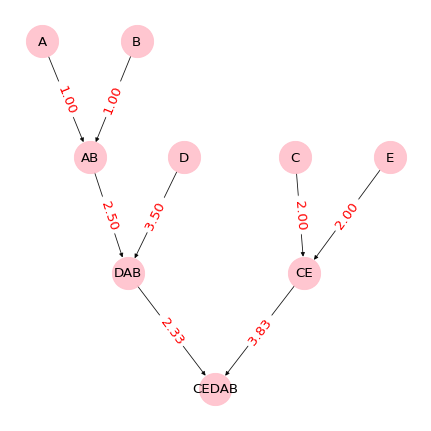

In [73]:
# Testing cell - Do not alter.

# Visible tests to check your code

# single test
sequences = [('A', 'GATTATTACA'), ('B', 'GATTATTACG'), ('C', 'GATTAATAGG'), ('D', 'GATTTTTACG'), ('E', 'GTTTAATAGG')]
agglomerative_clustering(sequences)



### Question 4H (short answer)

(2 marks, max 200 words)

<div class="alert alert-info">

What is the difference between trees generated by UPGMA vs neighbor joining? (1 mark)
    
Why is neighbor joining considered more practical for phlogenetic analysis?  (1 mark)
    
</div>


<span style="color:rgb(17, 122, 121); font-family:Courier"><i><b># -- GRADED CELL (2 marks) - complete this cell --</b></i></span>

YOUR ANSWER HERE



UPGMA uses average linkage, which is the mean distance between elements of each group. To create UPGMA, it generates rooted and ultrametric trees. An ultrametric tree is a tree that its distances from the root to every branch tip are equal. That means that the mutation rate along each branch would have to be the same. We call it a molecular clock. However, we can't assume that nature has a constant molecular clock. Therefore, UPGMA can't be used for phylogenetic tree reconstruction. 
On the other hand, neighbor joining uses distance based method and the tree is unrooted. It doesn't produce an ultrametric trees and hence, it doesn't assume a molecular clock. Therefore, we can use neighbor joining for phylogenetic reconstruction. 

Neighbor joining is more practical for phylogenetic analysis because it it not an utlrametric and considers the different evolution rate which is critical in the phylogenetic studies. 


<div style="background: rgb(255,165,0); border: solid 1px rgb(129,199,132); padding: 10px;">    
<h1>END OF ASSIGNMENT</h1>
</div>


## Submitting

Follow these steps to submit your assignment

1) Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

2) Make sure you have filled in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"

3) **Clear all output** (in the menubar, select Kernel$\rightarrow$Restart & Clear Output)

4) Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format.

5) You must also submit a copy of this notebook in `html` format with the output cleared (see step 3).


Your submission should include **only two** files with names formatted as: **Assignment_2.ipynb** and **Assignment_2.html**